In [1]:
cd ~/Dropbox/project_4

/home/ubuntu/Dropbox/project_4


In [2]:
star_wars = [
    'C-3PO', 
    'R2-D2', 
    'Jar Jar Binks', 
    'Luke Skywalker',
    'Jabba the Hutt',
    'Han Solo',
    'Darth Vader',
    'Palpatine',
    'Obi-Wan Kenobi',
    'Yoda',
    'Princess Leia'
]

harry_potter = [
    'Harry Potter (character)',
    'Hermione Granger', 
    'Ron Weasley', 
    'Albus Dumbledore', 
    'Lord Voldemort',
    'Severus Snape',
    'Draco Malfoy'
]

futurama = [
    'Philip J. Fry',
    'Leela (Futurama)',
    'Bender (Futurama)',
    'Professor Farnsworth',
    'Zoidberg',
]


avatar = [
    'Aang',
    'Katara (Avatar: The Last Airbender)',
    'Zuko',
    'Korra',
    'Iroh',
    'Sokka'
]


other = [
    'Jean-Luc Picard', 
    'Eric Cartman',
    'Bart Simpson',
    'Gandalf',
    'Sherlock Holmes',
    'Achilles',
    'Batman',
    'Shawn Spencer',
    'Buffy Summers',
    'Spike (Buffy the Vampire Slayer)',
    'Goku',
    'Edward Elric',
    'Alphonse Elric',
    'Willow Rosenberg',
    'Frodo Baggins',
    'Gollum',
    'Rick Sanchez (Rick and Morty)'
#     'Darth Maul'

]

coi = star_wars + harry_potter + futurama + avatar + other


In [3]:
from hwmf import utils, data, models, transforms
import numpy as np
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from cycler import cycler
import matplotlib
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import re
from adjustText import adjust_text

/home/ubuntu/anaconda3/envs/project_4/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/project_4/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
def get_name_to_vec(model):
    name_to_vec = {}
    for name in model.docvecs.doctags.keys():
        name_to_vec[name] = model.docvecs[name]
    return name_to_vec

def get_X_y(model):
    name_to_vec = get_name_to_vec(model)
#     name_to_vec = transforms.filter_titles(name_to_vec)
    y, X =  tuple(map(np.array, zip(*name_to_vec.items())))
    X = StandardScaler().fit_transform(X)
    return X, y

def get_closest_to_center(cluster_centers, points, y, num=5):
    names = []
    for center in cluster_centers:
        diffs = points - center
        distances = np.linalg.norm(diffs, axis=1)
        np.argsort(distances)
        names.append(y[np.argsort(distances)][:num])
    return names

def show_clusters(target_names, all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    s.sort_index(inplace=True)
    return s[s.index.isin(target_names)]

def sample_clusters(all_names, cluster_labels):
    s = pd.Series(cluster_labels, index=all_names)
    for cluster in np.unique(cluster_labels):
        print('Cluster', cluster)
        print(s[s == cluster].sample(20))
        print()


In [33]:
sample_clusters(y, cluster_labels)

Cluster 0
Mort Cinder                            0
Margaery Tyrell                        0
Zola (DC Comics)                       0
Durin                                  0
Circe in the arts                      0
Elatus                                 0
Polonius                               0
Ingeld                                 0
Ascanius                               0
Friar Laurence                         0
Tom Sawyer                             0
Uncle Albert                           0
The Mistress of the Copper Mountain    0
He-Man                                 0
Grayven                                0
Salmoneus                              0
Christopher Sly                        0
Stefan Dušan                           0
Sisillius II                           0
Tilpin                                 0
dtype: int32

Cluster 1
Captain Miki               1
Brad Bellick               1
Trot (Oz)                  1
Colin Nugent               1
Ventus (Kingdom Hearts)    1
S

In [5]:
model = utils.load_data('doc2vec_no_ents.pickle')

In [7]:
name_to_vec = get_name_to_vec(model)
X, y = get_X_y(model)

In [256]:
# pca = PCA(n_components=10)
# X = pca.fit_transform(X)

In [19]:
kmeans_model = cluster.KMeans(n_clusters=5, max_iter=5000)
cluster_labels = kmeans_model.fit_predict(X)

In [58]:
test1 = ['Professor Farnsworth', 'Rick Sanchez']
test2 = ['Palpatine', 'Lord Voldermort']
test3 = ['Yoda', 'Albus Dumbledore', 'Obi-Wan Kenobi']
test4 = ['Hermione Granger', 'Willow Rosenberg']
test5 = ['Bender (Futurama)', 'Eric Cartman']

In [16]:
show_clusters(coi, y, cluster_labels)

Aang                                   9
Achilles                               4
Albus Dumbledore                       8
Alphonse Elric                         9
Bart Simpson                           2
Bender (Futurama)                      0
Buffy Summers                          5
C-3PO                                  0
Darth Vader                            0
Draco Malfoy                           8
Edward Elric                           9
Eric Cartman                           2
Frodo Baggins                          8
Gandalf                                4
Goku                                   9
Gollum                                 8
Han Solo                               0
Harry Potter (character)               8
Hermione Granger                       8
Iroh                                   8
Jabba the Hutt                         0
Jar Jar Binks                          0
Katara (Avatar: The Last Airbender)    9
Korra                                  9
Lord Voldemort  

---

In [12]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
tsne.transform([point])[0]

In [88]:
kmeans_clusters

array([ 3,  5, 10, ..., 17, 10, 10], dtype=int32)

In [10]:
tsne = TSNE(n_iter=2000)
points_2d = tsne.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
points_2d = pca.fit_transform(X)

In [285]:
model.docvecs.most_similar('Katara (Avatar: The Last Airbender)')

[('Korra', 0.8402777314186096),
 ('Aang', 0.8282116055488586),
 ('Toph Beifong', 0.8154178857803345),
 ('Azula', 0.8061840534210205),
 ('Tenzin (The Legend of Korra)', 0.7603638172149658),
 ('Zaheer (The Legend of Korra)', 0.7522376775741577),
 ('Zuko', 0.7478345036506653),
 ('Iroh', 0.7329859137535095),
 ('Kuvira', 0.7109264731407166),
 ('Asami Sato', 0.7107080817222595)]

In [16]:
model.docvecs.most_similar('Lord Voldemort')

[('Harry Potter (character)', 0.8556894659996033),
 ('Albus Dumbledore', 0.8457760214805603),
 ('Severus Snape', 0.8355717658996582),
 ('Draco Malfoy', 0.8330152630805969),
 ('Ron Weasley', 0.8143746256828308),
 ('Hogwarts staff', 0.8139380216598511),
 ('Rubeus Hagrid', 0.813076913356781),
 ('Ginny Weasley', 0.7156810164451599),
 ('Hermione Granger', 0.6780641674995422),
 ('Death (Discworld)', 0.6650095582008362)]

In [13]:
short_names = ['Farnsworth', 'Malfoy', 'Bart', 'Jabba', 'Snape', 'Voldemort', 'Obi-Wan', 'Jar Jar', 'Luke', 'Cartman', 'Buffy', 'Frodo', 'Ron', 'Hermione']

In [17]:
point_labels = []
    
for character in coi:
    try:
        i = np.where(y == character)[0][0]
        character = re.sub(r'\(.*\)', '', character).strip()
        for sn in short_names:
            if sn in character:
                character = sn
                break
        point_labels.append((character, i))
    except:
        print(character)
    
    
point_labels

Princess Leia
Leela (Futurama)
Jean-Luc Picard
Batman
Willow Rosenberg
Rick Sanchez (Rick and Morty)


[('C-3PO', 189),
 ('R2-D2', 188),
 ('Jar Jar', 144),
 ('Luke', 156),
 ('Jabba', 10778),
 ('Han Solo', 10897),
 ('Darth Vader', 157),
 ('Palpatine', 10588),
 ('Obi-Wan', 163),
 ('Yoda', 190),
 ('Harry Potter', 2003),
 ('Hermione', 123),
 ('Ron', 10695),
 ('Albus Dumbledore', 126),
 ('Voldemort', 124),
 ('Snape', 120),
 ('Malfoy', 121),
 ('Philip J. Fry', 1138),
 ('Bender', 1076),
 ('Farnsworth', 1141),
 ('Zoidberg', 543),
 ('Aang', 6063),
 ('Katara', 4314),
 ('Zuko', 4047),
 ('Korra', 12110),
 ('Iroh', 4315),
 ('Sokka', 12124),
 ('Cartman', 484),
 ('Bart', 208),
 ('Gandalf', 153),
 ('Sherlock Holmes', 82),
 ('Achilles', 0),
 ('Shawn Spencer', 7391),
 ('Buffy', 113),
 ('Spike', 289),
 ('Goku', 1571),
 ('Edward Elric', 4453),
 ('Alphonse Elric', 5969),
 ('Frodo', 11246),
 ('Gollum', 10617)]

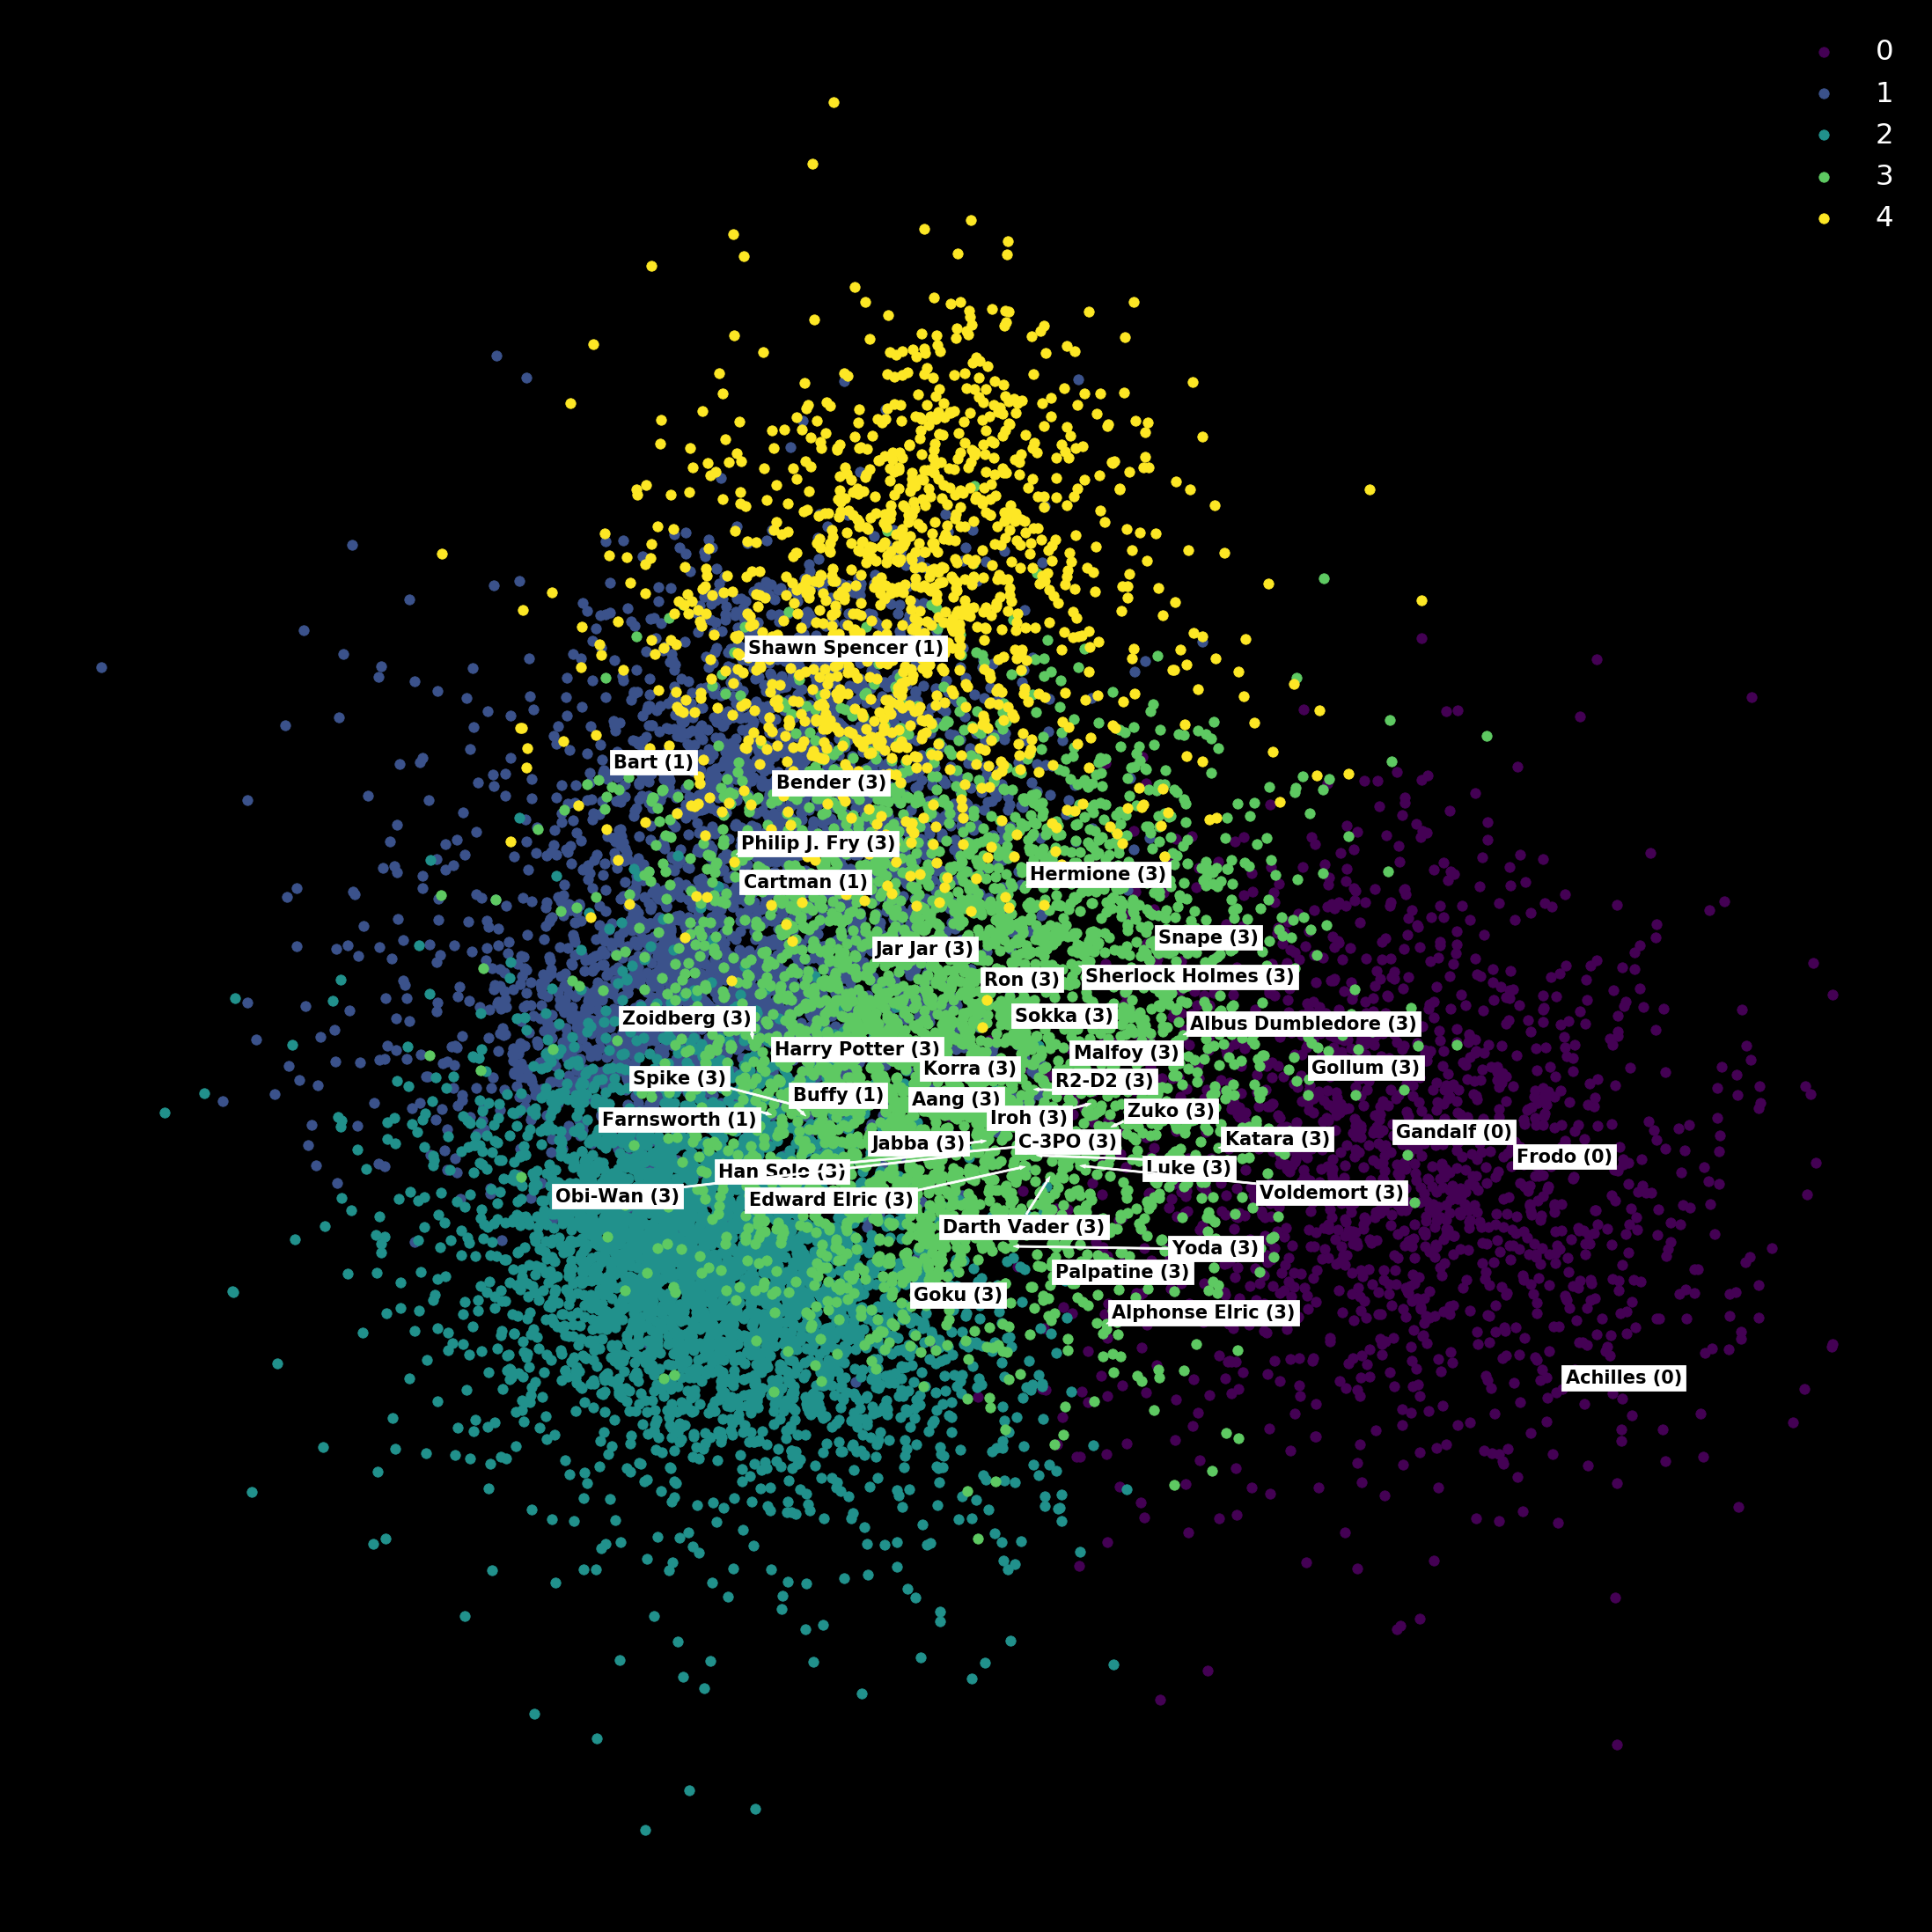

In [20]:
plt.rcParams['figure.dpi'] = 150
sns.set()
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.2,)

def plot_clustering(points_2d, cluster_labels, point_labels=None):
    tsne = TSNE(n_iter=250)
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    cmap = matplotlib.cm.get_cmap('viridis')
    num_clusters = len(np.unique(cluster_labels))
    ax.set_prop_cycle(cycler('color', [cmap(i) for i in np.linspace(0, 1, num_clusters)]))

    for label in np.unique(cluster_labels):
        points = points_2d[cluster_labels == label]
        plt.scatter(points[:, 0], points[:, 1], label=label, s=30)
        
    plt.legend()
#     texts = [plt.text(x[i], y[i], 'Text%s' %i) for i in range(len(x))]
#     adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))
    texts = []
    if point_labels is not None:
        for label, point_index in point_labels:
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=5)
            arrow_style =dict(facecolor='white', shrink=0)
#             text = ax.annotate(
#                 label, 
#                 xy=point, 
#                 fontsize=10, 
#                 verticalalignment='bottom', 
#                 horizontalalignment='center', 
#                 color='black', 
#                 weight='bold', 
#                 bbox=box_style, 
#                 xytext=(0, 30), 
#                 textcoords='offset pixels',
#                 arrowprops=arrow_style
#             )
#             texts.append(text)
        for label, point_index in point_labels:
            cluster_label = cluster_labels[point_index]
            point = points_2d[point_index]
            box_style = dict(fc='white', pad=2, alpha=1)
            
#             label = label.split(' ')[0]
            label += f' ({cluster_label})'
#             arrow_style =dict(facecolor=('gray'), arrowstyle='-')
            text = plt.text(
                point[0],
                point[1],
                label, 
                fontsize=10, 
                verticalalignment='bottom', 
                horizontalalignment='center', 
                color='black', 
                weight='bold', 
                bbox=box_style
                
            )
            texts.append(text)
    arrow_style =dict(facecolor=('white'), width=1, headwidth=2, headlength=3)
    adjust_text(texts, arrowprops=arrow_style, lim=1000)
    plt.tight_layout()
    
plot_clustering(points_2d, cluster_labels, point_labels)

In [60]:
from gensim.models import doc2vec

In [62]:
ls

category_notes.md  images/                main.py     sandbox.py
documents/         logs/                  notebooks/  setup.py
hwmf/              long_run_on_raw.model  README.md


In [63]:
laoded_model = doc2vec.Doc2Vec.load('hwmf/data/first_that_doesnt_suck.model')